In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import decimal
from decimal import *
import sys
import statistics 
from matplotlib.lines import Line2D
import math
from datetime import datetime
%matplotlib inline


In [2]:
#### CREDITS: Wencen Wu ####

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,ax,n, x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    x_input = []
    y_true = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    np.random.seed(11)
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                x_input.append([1, X1 + x,Y1 + y])
                y_true.append(+1)
                cnt += 1
            else:
                x_input.append([1, X2 + x,Y2 + y])
                y_true.append(-1)
                cnt += 1
        else:
            continue
    
    # plot the datapoints
    for i in range(len(y_true)):
        if(y_true[i] > 0):
            plt.scatter(x_input[i][1], x_input[i][2], s=2, color = 'steelblue')
        else:
            plt.scatter(x_input[i][1], x_input[i][2], s=2, color = 'darkorange')  
    
    return np.array(x_input), np.array(y_true).reshape(n,1), ax

In [3]:
def cal_classification_error(x, y, w):
    misclassified_pts = []
    
    #Evaluate whether the data points are classified based on the computed weights
    for i in range(len(x)):
        s = w.dot(x[i].transpose())

        if np.sign(s) != y[i]:
            misclassified_pts.append(i)
    
    #append the misclassified arrays for x and y
    train_x = [x[j] for j in misclassified_pts]
    train_y = [y[j] for j in misclassified_pts]
    
    #compute the error rate based on the number of misclassified points
    e_in = len(misclassified_pts)/len(x)
    
    return e_in, len(misclassified_pts), train_x, train_y

In [4]:
def perceptron(x, y, hard_stop, f_trans = False):
    ein_iters = []
    iterations = 0
    train_x = x
    train_y = y
    
    if f_trans == True:
        w = np.array([0,0,0,0,0,0,0,0,0,0])
    else:
        w = np.array([0,0,0])
    
    while iterations < hard_stop:
        #pick a point at random and compute its s = wTx.
        idx = np.random.randint(0,len(train_x))
        s = w.dot(train_x[idx].transpose())
        
        
        #check for the signs, if doesn't match, update the weight
        if np.sign(s) != train_y[idx]:
            w = w + (train_y[idx] * train_x[idx])
            
        #calculate the new training data set(the misclassified points become the new training dataset).
        e_in, misclassified_pts, train_x, train_y = cal_classification_error(x,y,w)
        
        if misclassified_pts == 0:
            break   
        
        ein_iters.append(e_in)
        iterations += 1
        
    # plot all the in-sample errors
    fig, ax = plt.subplots(figsize=(15,4.5))
    plt.title("PLA | Ein Vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Ein")
    ax.plot([i for i in range(1, 500)], [ein_iters[j] for j in range(1, 500)])
    plt.show
        
    return w, iterations, e_in, misclassified_pts    

In [5]:
def pocket(x, y, hard_stop, f_trans = False):
    ein_iters = []
    iterations = 0
    train_x = x
    train_y = y
    mis_pocket = []
    
    if f_trans == True:
        w = np.array([0,0,0,0,0,0,0,0,0,0])
    else:
        w = np.array([0,0,0])

    best_error = 1
    w_pocket = w
    
    while iterations < hard_stop:
        #pick a point at random and compute its s = wTx.
        np.random.seed(100)
        idx = np.random.randint(0,len(train_x))
        
        s = w.dot(train_x[idx].transpose())
        
        #check for the signs, if doesn't match, update the weight
        if np.sign(s) != train_y[idx]:
            w = w + (train_y[idx] * train_x[idx])
            
        #calculate the new training data set(the misclassified points become the new training dataset).
        e_in, misclassified_pts, train_x, train_y = cal_classification_error(x,y,w)
        
        # in-sample errors for every iteration
        if e_in < best_error :
            w_pocket = w
            best_error = e_in
            mis_pocket = misclassified_pts
   
        #compute the error rate based on the number of misclassified points
        ein_iters.append(best_error)
        
        if best_error == 0:
            break 
        
        iterations += 1
    
    # plot all the in-sample errors
    fig, ax = plt.subplots(figsize=(15,4.5))
    plt.title("Pocket algorithm | Ein Vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Ein")
    ax.plot([i for i in range(1, 500)], [ein_iters[j] for j in range(1, 500)])
    plt.show
    
    return w_pocket, iterations, best_error, mis_pocket 

In [6]:
def linear_regression(x, y, f_trans = False):
    if f_trans == True:
        w = np.array([0,0,0,0,0,0,0,0,0,0])
    else:
        w = np.array([0,0,0])
    
    x_inv = np.linalg.inv(x.transpose().dot(x))
    x_pinv = x_inv.dot(x.transpose())
    w = x_pinv.dot(y)
    
    return w

In [7]:
def feature_transform(x):
    z = np.empty([len(x), 10])
    
    for i in range(len(x)):

        z[i][0] = 1
        z[i][1] = x[i][1]
        z[i][2] = x[i][2]
        z[i][3] = (x[i][1])**2
        z[i][4] = x[i][1] * x[i][2]
        z[i][5] = (x[i][2])**2
        z[i][6] = (x[i][1])**3
        z[i][7] = (x[i][1]**2) * x[i][2]
        z[i][8] = x[i][1] * (x[i][2]**2)
        z[i][9] = (x[i][2])**3
        
    return z

In [8]:
def plot_boundary(x, w, ax, error, z = None, f_trans = False):    
    
    legend_elements = [Line2D([0],[0], color='crimson', lw=2, label='Final Hypothesis, g'),
                       Line2D([0], [0], marker='o', color='steelblue', label='y = +1',markersize=7),
                       Line2D([0], [0], marker='o', color='darkorange', label='y = -1',markersize=7)]   
    if f_trans == False:
        x_axis_points = np.array(ax.get_xlim())
        
        #compute the slope and intercept for the final hypothesis
        final_slope = -1*(w[1]/w[2])  
        final_intercept = -1*(w[0]/w[2])
    
        #compute the final hypothesis
        y_pred = x_axis_points * final_slope + final_intercept
        
        #plot the final hypothesis
        ax.plot(x_axis_points,y_pred,color = 'crimson', Label = 'Final Hypothesis, g')
    
    else: 
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        delta = 0.005
        x1, x2 = np.meshgrid(np.arange(xmin, xmax, delta), np.arange(ymin, ymax, delta))
        y_pred = w[0]*1 + w[1]*(x1) + w[2]*(x2) + \
                             w[3]*(x1**2) + w[4]*(x1*x2) + w[5]*(x2**2) + \
                             w[6]*(x1**3) + w[7]*(x1**2*x2) + w[8]*(x1*x2**2) +  w[9]*(x2**3)
        ax.contour(x1,x2, y_pred, levels=[0], colors = ['crimson'])
    ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1.5, 0.75), fontsize=10.5)

#### a. PLA

Iterations = 1000
In-sample error = 0.13
Misclassified points = 253
Time taken for PLA: 0:00:07.414238


<function matplotlib.pyplot.show(*args, **kw)>

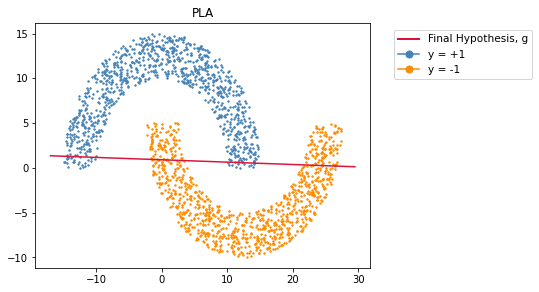

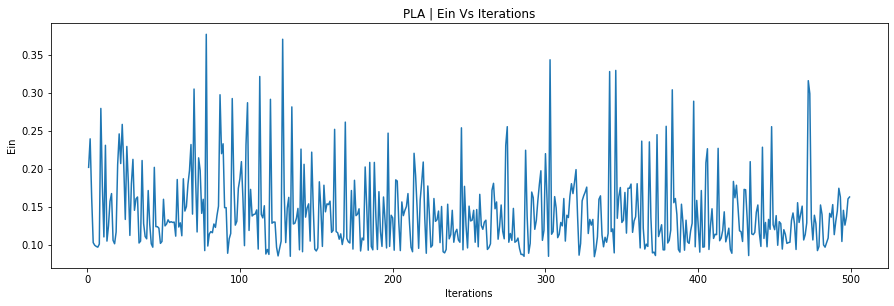

In [9]:
#parameters
rad = 10
thk = 5
sep = -5
sample_size = 2000
hard_stop = 1000
fig, ax1 = plt.subplots(figsize=(6,4.5))
plt.title("PLA")

# PLA
x_input, y_true, ax1 = generatedata(rad,thk,sep, ax1,sample_size)
start_time = datetime.now()
pla_w, iterations, e_in, train_misclassified_pts = perceptron(x_input, y_true, hard_stop)
total_time = datetime.now() - start_time
print("Iterations = {}".format(iterations))
print("In-sample error = {}".format('%.2f'%(e_in)))
print("Misclassified points = {}".format(train_misclassified_pts))
print("Time taken for PLA: {}".format(total_time))

plot_boundary(x_input,pla_w, ax1, e_in)
plt.show

#### b & c. Pocket Algorithm for 100,000 iterations and Ein Vs Iterations

Iterations = 100000
In-sample error = 0.08
Misclassified points = 167
Time taken for Pocket: 0:11:54.090136


<function matplotlib.pyplot.show(*args, **kw)>

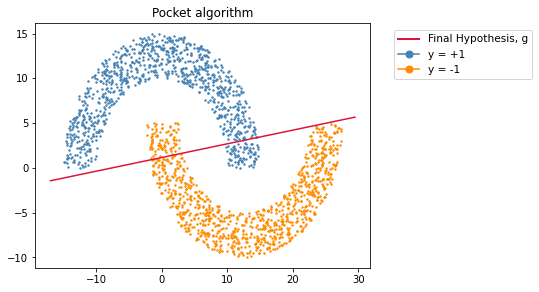

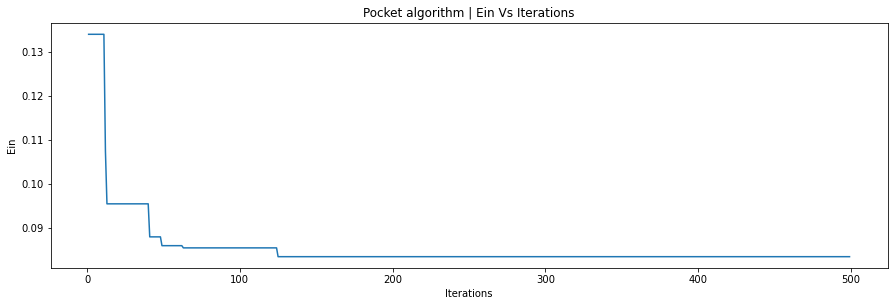

In [10]:
hard_stop = 100000
fig, ax2 = plt.subplots(figsize=(6,4.5))

# Pocket algorithm
plt.title("Pocket algorithm")
x_input, y_true, ax2 = generatedata(rad,thk,sep, ax2,sample_size)
start_time = datetime.now()
w_pocket, iterations, best_error, mis_pocket  = pocket(x_input, y_true, hard_stop)
total_time = datetime.now() - start_time
print("Iterations = {}".format(iterations))
print("In-sample error = {}".format('%.2f'%(best_error)))
print("Misclassified points = {}".format(mis_pocket))
print("Time taken for Pocket: {}".format(total_time))
plot_boundary(x_input, w_pocket, ax2, best_error)
plt.show

#### d. Linear regression algorithm

Time taken for Linear Regression: 0:00:00.001958


<function matplotlib.pyplot.show(*args, **kw)>

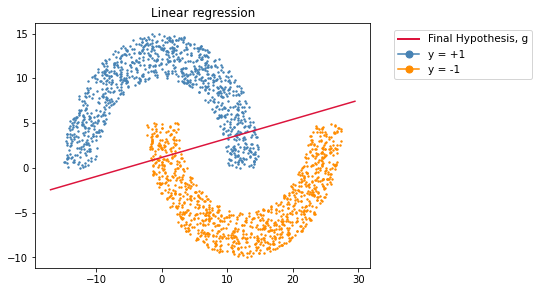

In [11]:
fig, ax3 = plt.subplots(figsize=(6,4.5))
# Linear regression
plt.title("Linear regression")
x_input, y_true, ax3 = generatedata(rad,thk,sep, ax3,sample_size)
start_time = datetime.now()
linr_w = linear_regression(x_input, y_true)
total_time = datetime.now() - start_time
print("Time taken for Linear Regression: {}".format(total_time))
plot_boundary(x_input, linr_w, ax3, 0)
plt.show

Pocket algorithm takes 12 minutes for 100000 iterations, the resultant in-sample error is 0.08.
Linear regression takes approximately 2 milliseconds and separates both the classes better when compared to pocket algorithm.

#### e. Linear regression algorithm with feature transformation

Time taken for linear regression with feature transformation: 0:00:00.016355


<function matplotlib.pyplot.show(*args, **kw)>

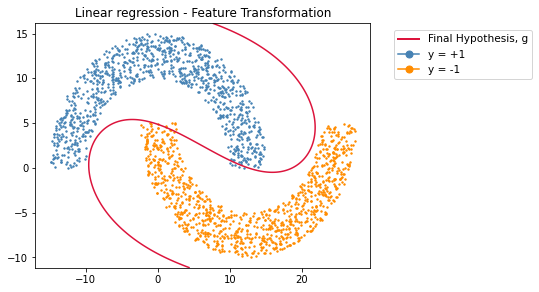

In [12]:
fig, ax4 = plt.subplots(figsize=(6,4.5))
# Linear regression
plt.title("Linear regression - Feature Transformation")
x_input, y_true, ax4 = generatedata(rad,thk,sep, ax4,sample_size)
start_time = datetime.now()
z = feature_transform(x_input)
linr_trans_w = linear_regression(z, y_true, f_trans = True)
total_time = datetime.now() - start_time
print("Time taken for linear regression with feature transformation: {}".format(total_time))
plot_boundary(x_input, linr_trans_w, ax4, 0, z, f_trans = True)
plt.show

#### e. Pocket algorithm with feature transformation

Iterations = 100000
In-sample error = 0.04
Time taken for pocket algorithm with feature transformation: 0:12:18.922280
Misclassified points = 83


<function matplotlib.pyplot.show(*args, **kw)>

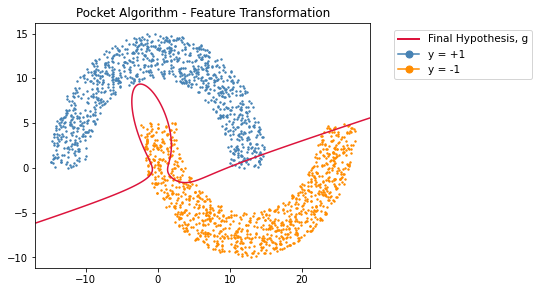

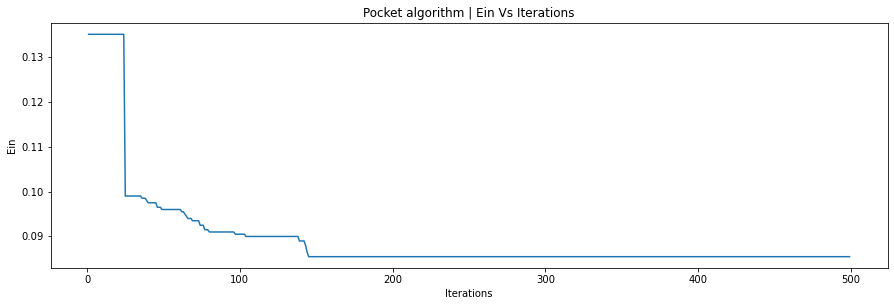

In [13]:
hard_stop = 100000
fig, ax5 = plt.subplots(figsize=(6,4.5))

# Pocket algorithm
plt.title("Pocket Algorithm - Feature Transformation")
x_input, y_true, ax5 = generatedata(rad,thk,sep, ax5,sample_size)
start_time = datetime.now()
z = feature_transform(x_input)
ft_w_pocket, ft_iterations, ft_best_error, ft_mis_pocket  = pocket(z, y_true, hard_stop, f_trans = True)
total_time = datetime.now() - start_time
print("Iterations = {}".format(ft_iterations))
print("In-sample error = {}".format('%.2f'%(ft_best_error)))
print("Time taken for pocket algorithm with feature transformation: {}".format(total_time))
print("Misclassified points = {}".format(ft_mis_pocket))
plot_boundary(x_input, ft_w_pocket, ax5, 0, z, f_trans = True)
plt.show

Pocket algorithm on the features that are transformed to a 3rd order polynomial takes 12 minutes for 100000 iterations, the resultant in-sample error is 0.04.
Linear regression takes approximately 16 milliseconds and separates both the classes better when compared to pocket algorithm.